## Example 2: Estimating MSR via SDP for all connected graphs on $n$ vertices

In this example, we will compute the MSR of all connected graphs on $n$ vertices using a more comprehensive strategy that involves combinatorial techniques and, if necessary, semidefinite programming (SDP).

In [1]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)

import msr

## Generating all connected graphs on $n$ vertices
We can generate all the connected graphs on $n$ vertices, up to isomorphism, using the `generate_all_graphs_on_n_vertices()` function. [OEIS A001349](https://oeis.org/A001349) gives the number of connected graphs on $n$ vertices up to isomorphism, which for $n=6$ is 112. 

In [2]:
graphs = msr.graph.generate_all_graphs_on_n_vertices(n=6)

100%|██████████| 32768/32768 [00:06<00:00, 5193.70it/s]

Number of connected graphs on 6 vertices: 112


## Inspecting a graph
We can take a look at one of the graphs generated by simply calling `print()` on it.

In [3]:
idx = 81
G = graphs[idx]
print(G)

n6k3452
Number of edges: 8
Edges:
  0	{2, 4}
  1	{0, 4}
  2	{3, 4}
  3	{1, 5}
  4	{2, 3}
  5	{0, 5}
  6	{2, 5}
  7	{1, 3}


That's nice, but hard to visualize. We can use the `draw_graph()` function to help with this.

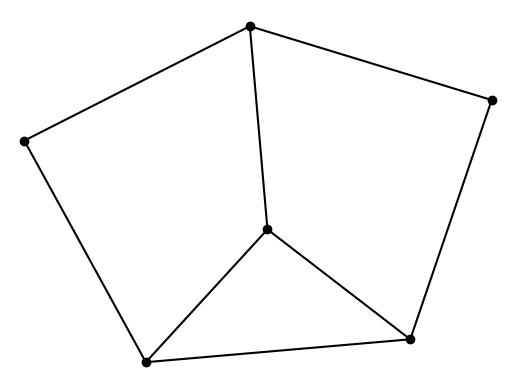

In [4]:
msr.graph.draw_graph(G, embedding="min_entropy")

## Computing the MSR of a graph
The `msr_bounds()` function can be used to compute the MSR of a graph. This function returns a tuple of the lower and upper bounds on the MSR of the graph.

In [5]:
d_lo, d_hi = msr.msr_bounds(G)
print(d_lo, d_hi)

3 3


When the bounds match, we can be sure that the MSR of the graph is equal to the bounds. In the example above, we see that $\text{msr}(G) = 3$.

## Computing the MSR of all connected graphs on $n=6$ vertices
We could compute the MSR of each graph using the `msr_bounds()` function, but fortunately we can use the `msr_batch()` function, which speeds up the process with parallel processing.

In [6]:
bounds_and_hash_ids = msr.msr_batch(graphs)

100%|██████████| 112/112 [00:00<00:00, 552.90it/s]


The `bounds_and_hash_ids` returned is a list of tuples, where each tuple contains the lower and upper bounds on the MSR of a graph, as well as the hash ID of the graph. The hash ID is a unique identifier for the graph. Let's take a look at one of the tuples.

In [7]:
d_lo, d_hi, hash_id = bounds_and_hash_ids[idx]
print(d_lo, d_hi, hash_id)

3 3 n6k3455


The `hash_id` of a graph is a unique identifier for the graph. We can use it to retrieve the graph later on. `n6` idicates the graph has 6 vertices, and `k32767` indicates the edges present in the graph via a binary string.

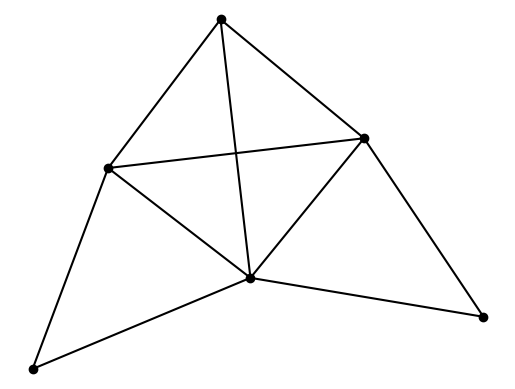

In [8]:
G = msr.graph.SimpleGraph(num_verts=6)
G.build_from_hash_str(hash_id)
msr.graph.draw_graph(G, embedding="min_entropy")

## Computing the MSR of all connected graphs on $n=7$ vertices
That was pretty fast. We can see that the problem on $n=7$ vertices is a bit more challenging. The number of connected graphs on $n=7$ vertices is 853, which is not so bad, but the combinatorial problem on each graph can be significantly more complex.

Generating all connected graphs on $n=7$ vertices will take a bit longer. The following code may take a few minutes.

In [9]:
# graphs_n7 = msr.graph.generate_all_graphs_on_n_vertices(n=7)

With all the graphs generated, we can now compute the MSR of all connected graphs on $n=7$ vertices.

In [10]:
# bounds_and_hash_ids_n7 = msr.msr_batch(graphs_n7)